In [1]:
import numpy as np
import tensorflow as tf

In [2]:
def load_fashion_mnist():
        
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    assert x_train.shape == (60000, 28, 28)
    assert x_test.shape == (10000, 28, 28)
    assert y_train.shape == (60000,)
    assert y_test.shape == (10000,)

    # normalize
    x_train = x_train.reshape(60000, -1).astype(np.float32) / 255.
    x_test = x_test.reshape(10000, -1).astype(np.float32) / 255.

    # to one-hot
    y_train = tf.one_hot(y_train, 10, 1., 0.).numpy()
    y_test = tf.one_hot(y_test, 10, 1., 0.).numpy()

    return x_train, x_test, y_train, y_test

def load_cifar10():
        
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    assert x_train.shape == (50000, 32, 32, 3)
    assert x_test.shape == (10000, 32, 32, 3)

    print(y_train.shape)
    assert y_train.shape == (50000,1)
    assert y_test.shape == (10000,1)

    # normalize
    x_train = x_train.reshape(50000, -1).astype(np.float32) / 255.
    x_test = x_test.reshape(10000, -1).astype(np.float32) / 255.

    # to one-hot
    y_train = tf.one_hot(y_train[:, 0], 10, 1., 0.).numpy()
    y_test = tf.one_hot(y_test[:, 0], 10, 1., 0.).numpy()

    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = load_cifar10()


# Define neural network inputnoutput
input_size = x_train.shape[1]
output_size = y_train.shape[1]

print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(50000, 1)
(50000, 3072) (10000, 3072) (50000, 10) (10000, 10)


In [3]:
# this is just for working with notebooks and classes outside the scope
import importlib
import NeuralNetwork
import Activations
importlib.reload(NeuralNetwork)
importlib.reload(Activations)
NeuralNetwork = NeuralNetwork.NeuralNetwork
########################################################################


# Create and train the neural network
neural_network = NeuralNetwork(input_size, output_size)

In [4]:
neural_network.train(x_train, y_train, learning_rate=0.001, num_epochs=10, batch_size=64)

# Make predictions on the test set
y_pred = neural_network.predict(x_test)

# Calculate accuracy
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100}%")

Epoch 1/10, Loss: 0.03013741646643289
Epoch 2/10, Loss: 0.026655195418271684
Epoch 3/10, Loss: 0.025184045509561225
Epoch 4/10, Loss: 0.024214489377430377
Epoch 5/10, Loss: 0.023463225686211467
Epoch 6/10, Loss: 0.022849922248611074
Epoch 7/10, Loss: 0.022316527044046176
Epoch 8/10, Loss: 0.021827712235840704
Epoch 9/10, Loss: 0.021380920824392687
Epoch 10/10, Loss: 0.020981017896339535
Accuracy: 49.17%


# Gerando visualizações dos valores de pesos e ativações

## Histograma dos pesos de cada camada

min weight -0.206732706842245
max weight 0.2252472173393537
mean weight -0.0007588155472659509


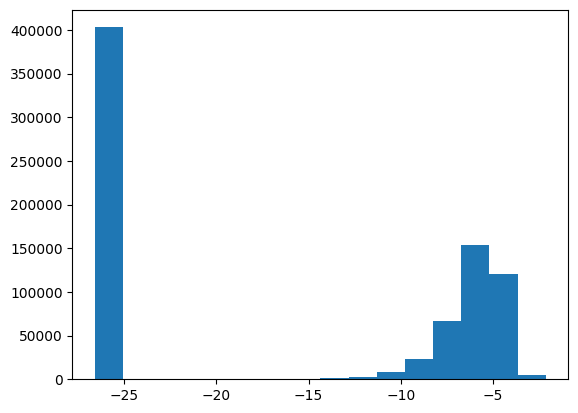

min weight -0.4266178705919244
max weight 0.37258443727258994
mean weight -0.0024731146428084573


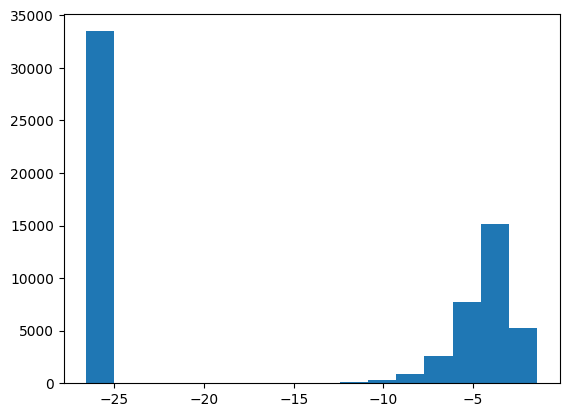

min weight -0.3863583116209813
max weight 0.4234838501927421
mean weight -0.0011296464927521043


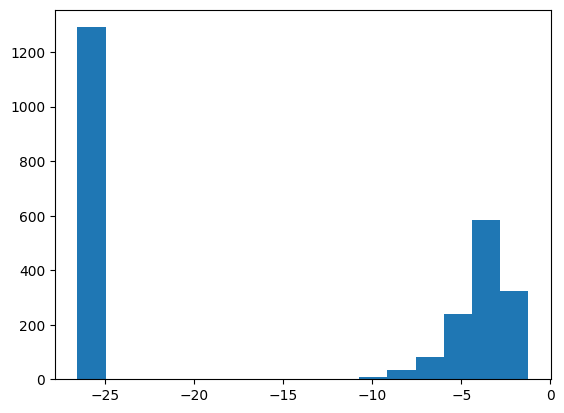

In [5]:
import FullyConnectedLayer 
import matplotlib.pyplot as plt

for layer in neural_network.layers:
    if isinstance(layer, FullyConnectedLayer.FullyConnectedLayer):

        # vetor de pesos
        weight_vector = np.ravel(layer.weights)

        print("min weight", np.min(weight_vector))
        print("max weight", np.max(weight_vector))
        print("mean weight", np.mean(weight_vector))
        
        #plt.hist(x=weight_vector, bins=16)
        #plt.show()

        cliped_value = np.where(weight_vector < 1e-8, 1e-8, weight_vector)
        plt.hist(x=np.log2(cliped_value), bins=16)
        plt.show()

## Histograma do bias de cada camada

min weight -0.4305869155871098
max weight 0.34022843276597414
mean weight 0.001364399723630995


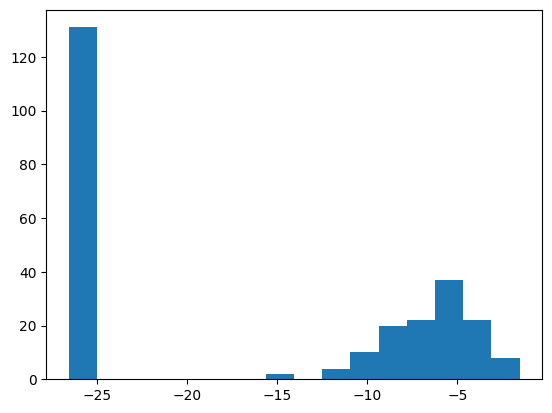

min weight -0.2637874929666745
max weight 0.7433110107458295
mean weight 0.010665930893159516


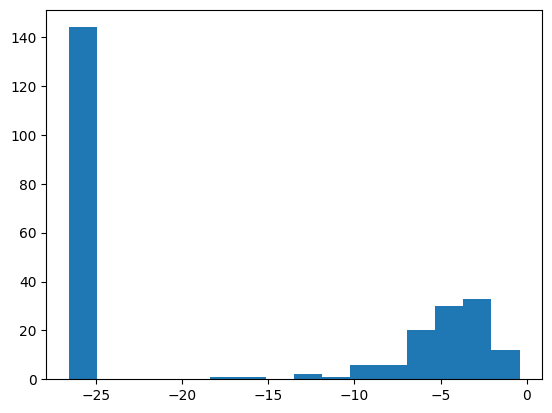

min weight -0.6215866493489459
max weight 0.9601732954067835
mean weight 1.3877787807814457e-16


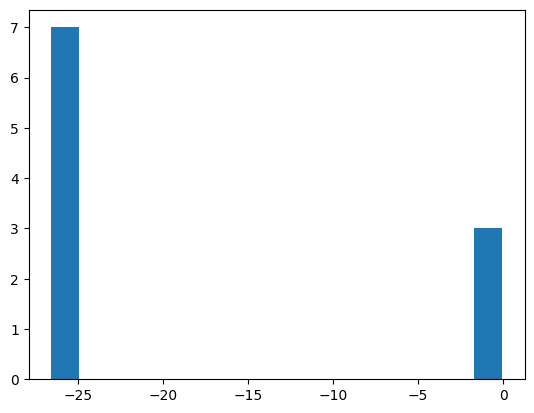

In [6]:
import FullyConnectedLayer 
import matplotlib.pyplot as plt

for layer in neural_network.layers:
    if isinstance(layer, FullyConnectedLayer.FullyConnectedLayer):

        # vetor de bias
        biases_vector = np.ravel(layer.biases)

        print("min weight", np.min(biases_vector))
        print("max weight", np.max(biases_vector))
        print("mean weight", np.mean(biases_vector))
        
        #plt.hist(x=biases_vector, bins=16)
        #plt.show()

        cliped_value = np.where(biases_vector < 1e-8, 1e-8, biases_vector)
        plt.hist(x=np.log2(cliped_value), bins=16)
        plt.show()

## Histograma das ativações de cada camada

input image


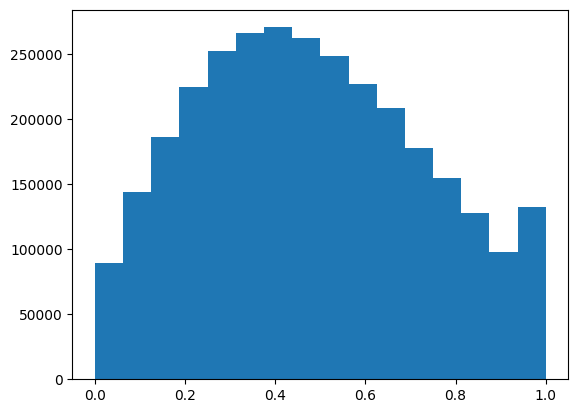

layer 0 <FullyConnectedLayer.FullyConnectedLayer object at 0x000001D72E9F0C10>


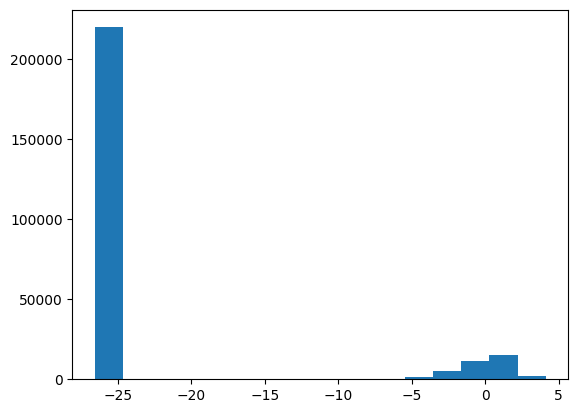

layer 1 <Activations.ReLU object at 0x000001D72E9F0970>


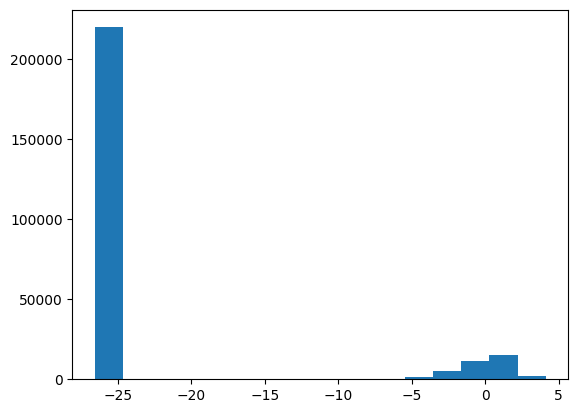

layer 2 <FullyConnectedLayer.FullyConnectedLayer object at 0x000001D72E9F00D0>


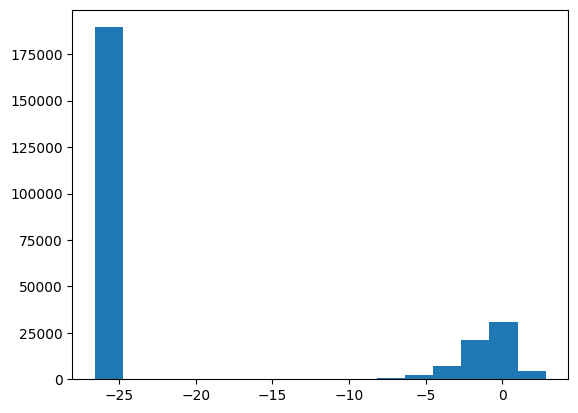

layer 3 <Activations.ReLU object at 0x000001D72E9F0D60>


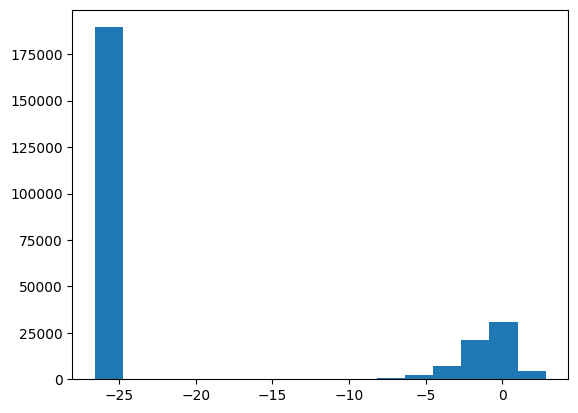

layer 4 <FullyConnectedLayer.FullyConnectedLayer object at 0x000001D72E9F0CA0>


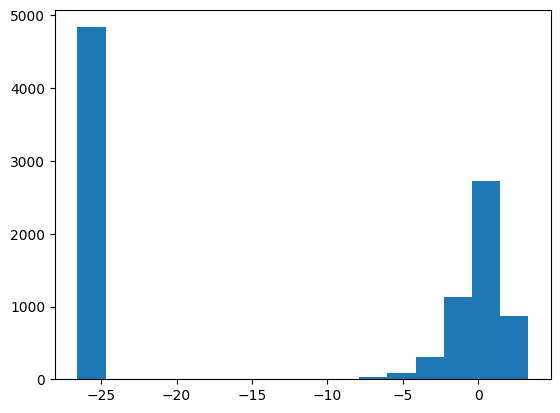

In [7]:
import FullyConnectedLayer 
import matplotlib.pyplot as plt


x = x_test[0:1000]
print("input image")

cliped_value = np.where(x < 1e-8, 1e-8, x)
plt.hist(x=np.ravel(cliped_value), bins=16)
plt.show()

for i, layer in enumerate(neural_network.layers):


    print(f"layer {i} {layer}")
    output = layer.forward(x)
    x = output

    output_vector = np.ravel(output)

    #plt.hist(x=output_vector, bins=16)
    #plt.show()

    cliped_value = np.where(output_vector < 1e-8, 1e-8, output_vector)
    plt.hist(x=np.log2(cliped_value), bins=16)
    plt.show()

## Histograma dos erros 

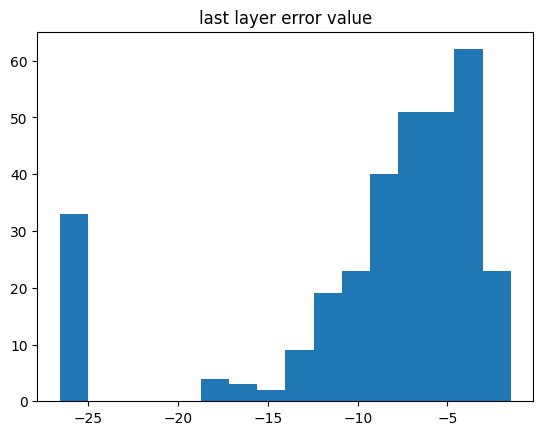

312.45786254606503


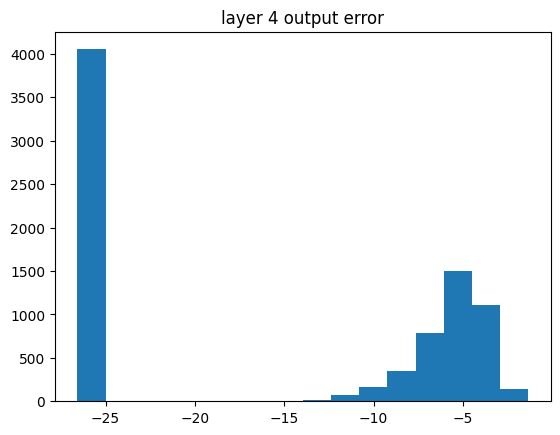

84.11738317183828


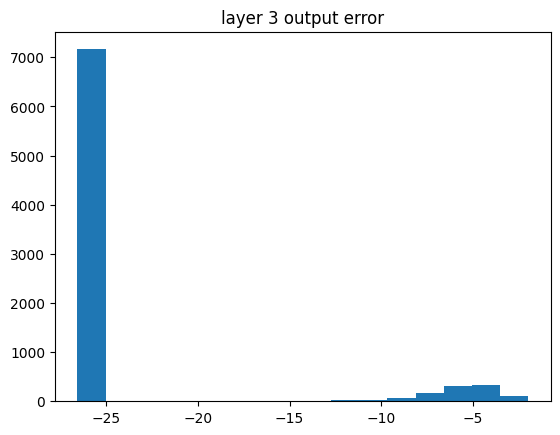

252.15871227077383


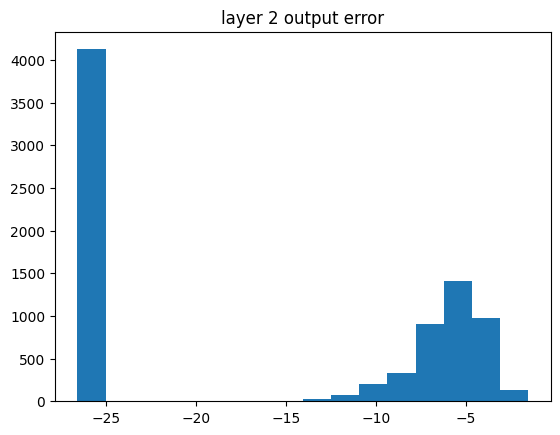

47.04488166975761


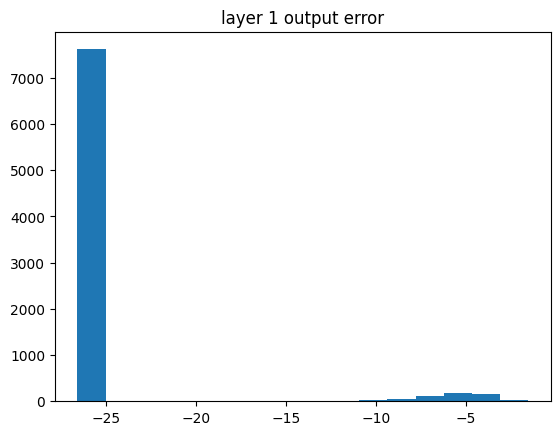

1015.7755572517603


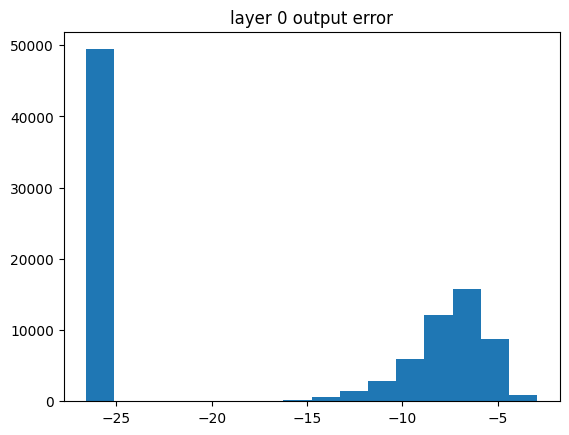

In [16]:
import FullyConnectedLayer 
import matplotlib.pyplot as plt


x = x_train[0:32]
y_true = y_train[0:32]
learning_rate = 0.001

# Forward pass
z = neural_network.forward(x)

# apply softmax
y_pred = neural_network.softmax.forward(z)

# Compute loss
loss = neural_network.cross_entropy_loss_with_logits(y_pred, y_true)

# Compute the derivative of the loss
dz = neural_network.cross_entropy_loss_with_logits_derivative(y_pred, y_true)


dz_vector = np.ravel(dz)
cliped_value = np.where(dz_vector < 1e-8, 1e-8, dz_vector)


plt.hist(x=np.log2(cliped_value), bins=16)
plt.title("last layer error value")
plt.show()


# backward pass
for i, layer in enumerate(reversed(neural_network.layers)):
    
    dz = layer.backward(dz, learning_rate)

    print(np.sum(np.abs(dz)))

    dz_vector = np.ravel(dz)
    cliped_value = np.where(dz_vector < 1e-8, 1e-8, dz_vector)

    plt.hist(x=np.log2(cliped_value), bins=16)
    plt.title(f"layer {4-i} output error")
    plt.show()

# 

## Calculo do gradiente para cada pesos

import FullyConnectedLayer 
import matplotlib.pyplot as plt


x = x_train[0:32]
y_true = y_train[0:32]
learning_rate = 0.001

# Forward pass
z = neural_network.forward(x)

# apply softmax
y_pred = neural_network.softmax.forward(z)

# Compute loss
loss = neural_network.cross_entropy_loss_with_logits(y_pred, y_true)

# Compute the derivative of the loss
dz = neural_network.cross_entropy_loss_with_logits_derivative(y_pred, y_true)


dz_vector = np.ravel(dz)
cliped_value = np.where(dz_vector < 1e-8, 1e-8, dz_vector)


plt.hist(x=np.log2(cliped_value), bins=16)
plt.title("last layer error value")
plt.show()


# backward pass
for i, layer in enumerate(reversed(neural_network.layers)):
    
    dz = layer.backward(dz, learning_rate)

    print(np.sum(np.abs(dz)))

    dz_vector = np.ravel(dz)
    cliped_value = np.where(dz_vector < 1e-8, 1e-8, dz_vector)

    plt.hist(x=np.log2(cliped_value), bins=16)
    plt.title(f"layer {4-i} output error")
    plt.show()